In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams["font.family"] = "Nanum Gothic"

In [53]:
df = pd.read_csv("../data/processed/emergency_df.csv")

In [89]:
df.astype({"병상수": float}).groupby("의료기관분류")["병상수"].mean()

dutyEmclsName
권역응급의료센터     878.590909
응급실운영신고기관    145.723214
지역응급의료기관     223.939394
지역응급의료센터     517.882353
Name: 병상수, dtype: float64

In [117]:
df.groupby("의료기관분류").hperyn.mean()

의료기관분류
권역응급의료센터                  30.954545
응급의료기관 외의 의료기관(응급의료시설)     8.359375
지역응급의료기관                  10.317536
지역응급의료센터                  23.468750
Name: hperyn, dtype: float64

In [131]:
df.groupby("의료기관분류").hperyn.apply(lambda x: x.isna().sum())

의료기관분류
권역응급의료센터                   0
응급의료기관 외의 의료기관(응급의료시설)    48
지역응급의료기관                  20
지역응급의료센터                   8
Name: hperyn, dtype: int64

In [133]:
df.groupby("의료기관분류").hperyn.apply(lambda x: (x <= 0).sum())

의료기관분류
권역응급의료센터                  0
응급의료기관 외의 의료기관(응급의료시설)    3
지역응급의료기관                  3
지역응급의료센터                  0
Name: hperyn, dtype: int64

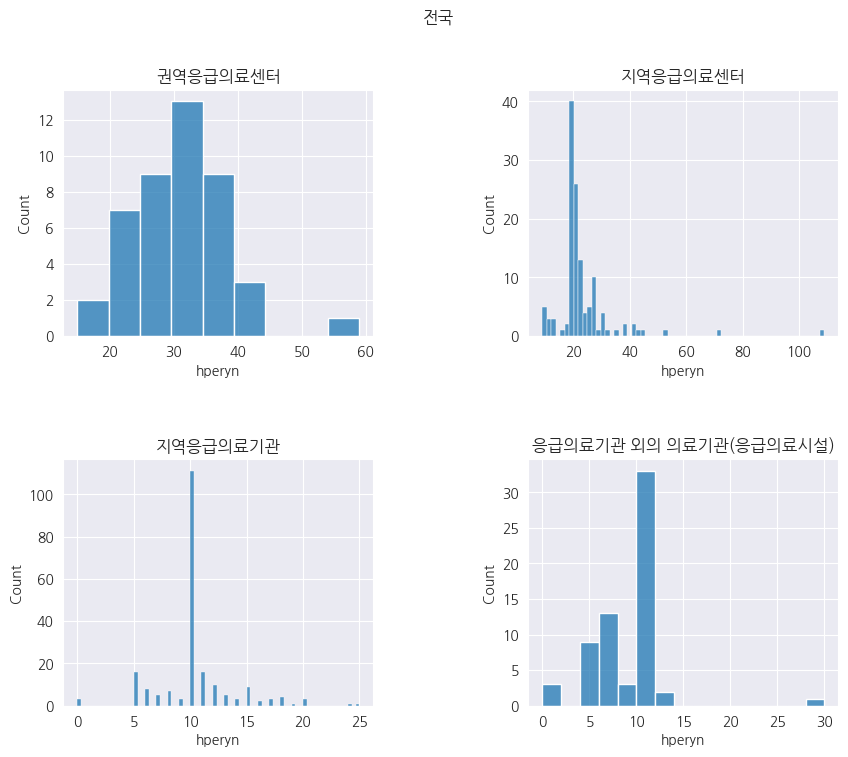

In [152]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle("전국")
for i, typ in enumerate(df.의료기관분류.drop_duplicates().values):
    sns.histplot(df[df.의료기관분류 == typ].hperyn, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(typ)

In [154]:
df[df.시도 == "경북"].groupby("의료기관분류").hperyn.mean()

의료기관분류
권역응급의료센터                  25.666667
응급의료기관 외의 의료기관(응급의료시설)     7.750000
지역응급의료기관                   9.631579
지역응급의료센터                  19.666667
Name: hperyn, dtype: float64

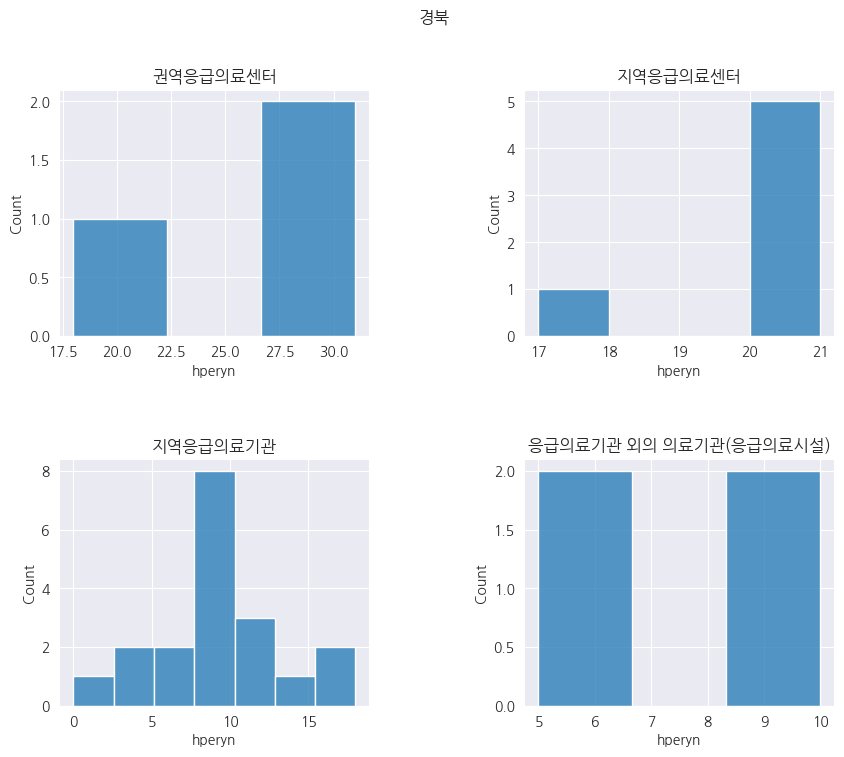

In [153]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle("경북")
for i, typ in enumerate(df.의료기관분류.drop_duplicates().values):
    sns.histplot(df[(df.의료기관분류 == typ) & (df.시도 == "경북")].hperyn, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(typ)